In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Training attention model

In [ ]:
encoder_att=EncoderAttention().to(device)
decoder_att=DecoderAttention().to(device)
criterion=nn.CrossEntropyLoss()
opt=torch.optim.Adam(decoder_att.parameters())

In [ ]:
def training(encoder, decoder, data, n_epochs):
    Loss=[]
    for epoch in range(n_epochs):
        loss_train=0
        for i,(img,cap,img_id) in enumerate(data):
            encoder_output=encoder(img.to(device))
            cap=cap.to(device)
            #zero gradient
            opt.zero_grad()
            #forward
            decoder_out=decoder(encoder_output, cap)
            loss=criterion(decoder_out.view(-1, decoder_out.size(-1)),
                       cap.view(-1).to(torch.int64))#.to(torch.float)
            #backward
            loss.backward()
            #update
            opt.step()
            loss_train+=loss.item()
        Loss.append(loss_train/len(data))
        if epoch%10==0:
            print(f'Epoch: {epoch}, Loss: {loss_train/len(data)}')
    return Loss

In [ ]:
LossAtt=training(encoder_att, decoder_att, data_loader, 101)

Epoch: 0, Loss: 2.312000365017756
Epoch: 10, Loss: 0.9842409521477408
Epoch: 20, Loss: 0.724993007640316
Epoch: 30, Loss: 0.5437870142666716
Epoch: 40, Loss: 0.41000920452483713
Epoch: 50, Loss: 0.3014826240468787
Epoch: 60, Loss: 0.21830640100452997
Epoch: 70, Loss: 0.15855856576602753
Epoch: 80, Loss: 0.12293430237465253
Epoch: 90, Loss: 0.08940155562608754
Epoch: 100, Loss: 0.07038488781683522


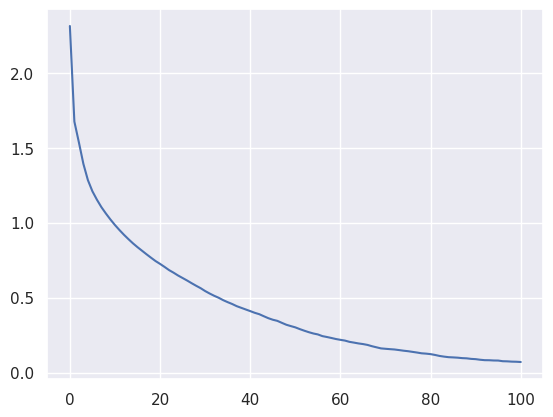

In [ ]:
import seaborn as sns
sns.set()
plt.plot(LossAtt)

In [ ]:
def val_file(ecd, dcd, img_file):
    ecd.eval()
    dcd.eval()
    with torch.no_grad():
        img=Image.open(img_path+img_file)
        img=transform(img)
        img=img.unsqueeze(dim=0)
        encoder_output=ecd(img.to(device))
        decoder_outputs=dcd(encoder_output)
        _, word_idx=decoder_outputs.topk(1)
        decoder_idx=word_idx.squeeze()
        cap=[]
        for idx  in decoder_idx:
            if idx.item()==eos_token:
                cap.append('EOS')
                break
            else:
                cap.append(idx_to_word[idx.item()])
        caption=' '.join(cap[1:-1])
    return caption

Text(0.5, 1.0, 'a dog make a small white dog in a yard exit a metal yard')

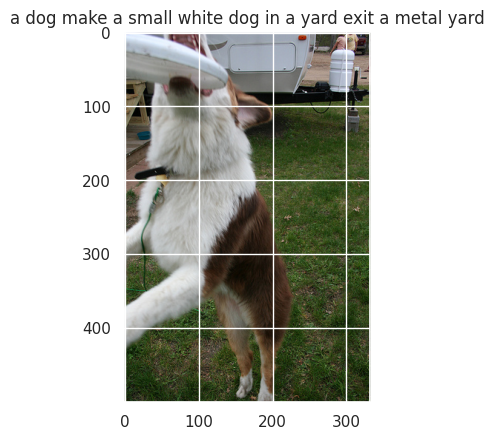

In [ ]:
n=torch.randint(0,1000,(1,))
caption_val=val_file(encoder_att, decoder_att, val_files[n])
plt.imshow(plt.imread(img_path+val_files[n]))
plt.title(caption_val)